In [1]:
### Process Scraped Data
## Import Libraries
import pandas as pd

## SEO Keywords
def load_keywords_from_csv(filepath, keyword_column='Keyword'):
    try:
        df = pd.read_csv(filepath)
        if keyword_column in df.columns:
            return set(df[keyword_column].astype(str).tolist())
        else:
            print(f"Error: Column '{keyword_column}' not found in {filepath}")
            return set()
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return set()

## TF-IDF
def analyze_tfidf(filepath, tfidf_column='TF-IDF Keywords'):
    try:
        df = pd.read_csv(filepath)
        if tfidf_column in df.columns:
            return set(df[tfidf_column].astype(str).tolist())
        else:
            print(f"Error: Missing '{tfidf_column}' column in {filepath}")
            return set()
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return set()

## Nav Bar
def extract_nav_keywords(filepath, main_category_col, sub_category_col, item_col):
    nav_keywords = set()
    try:
        df = pd.read_csv(filepath)
        if main_category_col in df.columns:
            nav_keywords.update(df[main_category_col].astype(str).str.lower().tolist())
        else:
            print(f"Warning: Column '{main_category_col}' not found in {filepath}")
        if sub_category_col in df.columns:
            nav_keywords.update(df[sub_category_col].astype(str).str.lower().replace('n/a', '', regex=False).tolist())
        else:
            print(f"Warning: Column '{sub_category_col}' not found in {filepath}")
        if item_col in df.columns:
            for items in df[item_col].astype(str).str.lower().tolist():
                nav_keywords.update(items.split(', '))
        else:
            print(f"Warning: Column '{item_col}' not found in {filepath}")
        return nav_keywords
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return set()

## Product Data
def load_product_data(filepath, column_mapping):
    product_words = set()
    try:
        df = pd.read_csv(filepath)
        if all(actual_col in df.columns for actual_col in column_mapping.values()):
            for index, row in df.iterrows():
                for standard_col in column_mapping.keys():
                    value = row.get(column_mapping[standard_col])
                    if isinstance(value, str):
                        product_words.update(value.lower().split())
        else:
            print(f"Error: One or more required columns not found in '{filepath}' based on the provided mapping.")
            print(f"Expected columns (mapped from): {column_mapping.values()}")
            print(f"Available columns: {df.columns.tolist()}")
    except FileNotFoundError:
        print(f"Error: File not found at '{filepath}'.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return product_words

## Abed Tahan
# Load data for Abedtahan
abedtahan_keywords = load_keywords_from_csv('Abed_Csv/seo_keywords.csv', keyword_column='Keyword')
abedtahan_tfidf = analyze_tfidf('Abed_Csv/tfidf_keywords.csv', tfidf_column='TF-IDF Keywords')
abedtahan_nav = extract_nav_keywords('Abed Tahhan/csv/navbar.csv', 'Main Category', 'Subcategory', 'Items')
abedtahan_columns = {'Main Category': 'Main Category', 'Product Category': 'Product Category', 'Product Name': 'Product Name'}
abedtahan_products = load_product_data('Abed_Csv/cleaned_Csv.csv', abedtahan_columns)

# Aggregate words for Abedtahan
abedtahan_aggregated = {
    'keywords': abedtahan_keywords,
    'tfidf': abedtahan_tfidf,
    'nav_bar': abedtahan_nav,
    'product_names': abedtahan_products
}
print("Abedtahan Aggregated Data:")
for key, value in abedtahan_aggregated.items():
    print(f"{key}: {len(value)} words/phrases")
print("-" * 30)

## Hamdan Electronics
# Load data for Hamdan Electronics
hamdan_keywords = load_keywords_from_csv('Hamdan_Csv/seo_keywords.csv', keyword_column='Keyword')
hamdan_tfidf = analyze_tfidf('Hamdan_Csv/tfidf_keywords.csv', tfidf_column='TF-IDF Keywords')
hamdan_nav = extract_nav_keywords('Hamdan_Csv/navbar.csv', 'Main Category', 'Subcategory', 'Items')
hamdan_columns = {'Main Category': 'Main Category', 'Product Category': 'Main Category', 'Product Name': 'Product Name'}
hamdan_products = load_product_data('Hamdan_Csv/cleaned_Csv.csv', hamdan_columns)

# Aggregate words for Hamdan Electronics
hamdan_aggregated = {
    'keywords': hamdan_keywords,
    'tfidf': hamdan_tfidf,
    'nav_bar': hamdan_nav,
    'product_names': hamdan_products
}
print("Hamdan Electronics Aggregated Data:")
for key, value in hamdan_aggregated.items():
    print(f"{key}: {len(value)} words/phrases")
print("-" * 30)

## Beytech
# Load data for Beytech
beytech_keywords = load_keywords_from_csv('Beytech_Csv/seo_keywords.csv', keyword_column='Keyword')
beytech_tfidf = analyze_tfidf('Beytech_Csv/tfidf_keywords.csv', tfidf_column='TF-IDF Keywords')
beytech_nav = extract_nav_keywords('Beytech_Csv/navbar.csv', 'Main Category', 'Subcategory', 'Items')
beytech_columns = {'Main Category': 'Main Category', 'Product Category': 'Main Category', 'Product Name': 'Product Name'}
beytech_products = load_product_data('Beytech_Csv/cleaned_Csv.csv', beytech_columns)

# Aggregate words for Beytech
beytech_aggregated = {
    'keywords': beytech_keywords,
    'tfidf': beytech_tfidf,
    'nav_bar': beytech_nav,
    'product_names': beytech_products
}
print("Beytech Aggregated Data:")
for key, value in beytech_aggregated.items():
    print(f"{key}: {len(value)} words/phrases")
print("-" * 30)

Abedtahan Aggregated Data:
keywords: 20 words/phrases
tfidf: 50 words/phrases
nav_bar: 237 words/phrases
product_names: 199 words/phrases
------------------------------
Hamdan Electronics Aggregated Data:
keywords: 20 words/phrases
tfidf: 50 words/phrases
nav_bar: 145 words/phrases
product_names: 431 words/phrases
------------------------------
Beytech Aggregated Data:
keywords: 20 words/phrases
tfidf: 50 words/phrases
nav_bar: 172 words/phrases
product_names: 265 words/phrases
------------------------------


In [2]:
### Technology Retail Store Keyword Disctionary

technology_retail_keywords = {
    ## General
    "technology retail",
    "electronics store",
    "online electronics store",
    "tech shop",
    "buy electronics online",

    ## Core Technology Products
    "smartphones",
    "laptops",
    "desktop computers",
    "tablets",

    ## Wearable Technology
    "smartwatches",
    "fitness trackers",
    "headphones",
    "speakers",

    ## Televisions
    "televisions",
    "smart TVs",
    "OLED TVs",
    "LED TVs",

    ## Cameras
    "cameras",
    "digital cameras",
    "DSLR cameras",

    ## Gaming
    "gaming consoles",
    "PlayStation",
    "Xbox",
    "Nintendo Switch",

    # #Computer Accessories
    "computer accessories",
    "keyboards",
    "mouse",
    "monitors",

    ## Mobile Accessories
    "mobile accessories",
    "phone cases",
    "chargers",
    "screen protectors",

    ## Home Appliances (increasingly tech-integrated)
    "home appliances",
    "smart home devices",

    ## Emerging Technologies
    "drones",
    "virtual reality",
    "VR headsets",

    ## Peripherals & Networking
    "printers",
    "networking devices",
    "routers",

    ## Brands 
    "Samsung",
    "Apple",
    "Huawei",
    "Xiaomi",
    "Sony",
    "HP",
    "Dell",
    "Lenovo",
    "LG",

    ## Specific Product Searches with Brands
    "Samsung smartphones",
    "Apple iPhones",
    "Sony headphones",
    "best smartphones",
    "cheap laptops",
    "discount TVs",

    ## Purchase Intent
    "buy smartphones online",
    "electronics store near me"
    "computer store in Lebanon",
    "where to buy smartphones in Lebanon",

    ## Other Relevant Terms
    "latest technology",
    "new technology",
    "price of smartphones",
    "price of laptops",
    "deals on electronics",
    "offers on smartphones",
    "smart speakers",
    "eReaders",
    "projectors",
    "gaming laptops",
    "computer parts",
    "camera lenses",
    "car electronics", 

}




In [3]:
### Analysis

## Find Common Keywords Across All Websites
common_across_all_aggregated = (abedtahan_aggregated['keywords'].union(abedtahan_aggregated['tfidf'], abedtahan_aggregated['nav_bar'], abedtahan_aggregated['product_names'])).intersection(
    (hamdan_aggregated['keywords'].union(hamdan_aggregated['tfidf'], hamdan_aggregated['nav_bar'], hamdan_aggregated['product_names'])),
    (beytech_aggregated['keywords'].union(beytech_aggregated['tfidf'], beytech_aggregated['nav_bar'], beytech_aggregated['product_names']))
)
print("\n Keywords Common Across All Three Websites")
print(common_across_all_aggregated)

## Identify Unique Keywords for Each Website Compared to Others
abedtahan_all = abedtahan_aggregated['keywords'].union(abedtahan_aggregated['tfidf'], abedtahan_aggregated['nav_bar'], abedtahan_aggregated['product_names'])
hamdan_all = hamdan_aggregated['keywords'].union(hamdan_aggregated['tfidf'], hamdan_aggregated['nav_bar'], hamdan_aggregated['product_names'])
beytech_all = beytech_aggregated['keywords'].union(beytech_aggregated['tfidf'], beytech_aggregated['nav_bar'], beytech_aggregated['product_names'])

unique_to_abedtahan_aggregated = abedtahan_all.difference(hamdan_all, beytech_all)
unique_to_hamdan_aggregated = hamdan_all.difference(abedtahan_all, beytech_all)
unique_to_beytech_aggregated = beytech_all.difference(abedtahan_all, hamdan_all)

print("\n Keywords Unique to Each Website Compared to Others")
print(f"**Unique to abedtahan.com (Aggregated):** {unique_to_abedtahan_aggregated}")
print(f"**Unique to hamdanelectronics.com (Aggregated):** {unique_to_hamdan_aggregated}")
print(f"**Unique to beytech.com.lb (Aggregated):** {unique_to_beytech_aggregated}")

## Comparison to tech dictionary 
def compare_aggregated_keywords_extended(website_name, aggregated_keywords, all_tech_keywords):
    all_website_keywords = aggregated_keywords['keywords'].union(
        aggregated_keywords['tfidf'],
        aggregated_keywords['nav_bar'],
        aggregated_keywords['product_names']
    )
    website_keywords_lower = {keyword.lower() for keyword in all_website_keywords}
    all_tech_keywords_lower = {keyword.lower() for keyword in all_tech_keywords}

    # Case-Insensitive Exact Match
    common_keywords = website_keywords_lower.intersection(all_tech_keywords_lower)
    unique_to_website_keywords = website_keywords_lower.difference(all_tech_keywords_lower)
    missing_from_website_keywords = all_tech_keywords_lower.difference(website_keywords_lower)

    print(f"--- Comparison for {website_name} (Case-Insensitive) ---")
    print(f"**Common Keywords (Website vs. Broad):** {common_keywords}")
    print(f"**Keywords Unique to {website_name}:** {unique_to_website_keywords}")
    print(f"**Technology Retail Keywords Missing from {website_name}:** {missing_from_website_keywords}")

    # Substring Matching in Website Keywords
    found_keywords_substring = set()
    for website_keyword in website_keywords_lower:
        for tech_keyword in all_tech_keywords_lower:
            if tech_keyword in website_keyword:
                found_keywords_substring.add(tech_keyword)

    unique_to_website_original_case_substring = {kw for kw in all_website_keywords if kw.lower() not in all_tech_keywords_lower}
    missing_from_website_original_case_substring = {kw for kw in all_tech_keywords if kw.lower() not in website_keywords_lower and not any(kw.lower() in wk for wk in website_keywords_lower)}

    print(f"\n--- Comparison for {website_name} (ASubstring Matching in Website Keywords) ---")
    print(f"**Technology Retail Keywords Found (as Substrings in Website Keywords):** {found_keywords_substring}")
    print(f"**Keywords Unique to {website_name} (Original Case, Substring Context):** {unique_to_website_original_case_substring}")
    print(f"**Technology Retail Keywords Missing (Not Found as Substring in Website Keywords):** {missing_from_website_original_case_substring}")


print("\n## eyword Analysis")
compare_aggregated_keywords_extended("abedtahan.com", abedtahan_aggregated, technology_retail_keywords)
compare_aggregated_keywords_extended("hamdanelectronics.com", hamdan_aggregated, technology_retail_keywords)
compare_aggregated_keywords_extended("beytech.com.lb", beytech_aggregated, technology_retail_keywords)




 Keywords Common Across All Three Websites
{'white', 'apple', '70', 'sale', 'personal', 'mini', 'humidifiers', 'refrigerators', 'accessories', '-', 'coffee', '7', 'refrigerator', '3', 'dryers', 'blender', 'care', 'electronics', 'dishwashers', 'laptops', 'dryer', 'silver', 'freezers', 'straightener', 'projectors', 'water dispensers', 'black', 'smart', 'with', 'hair', 'microwaves', 'nan', 'mobiles & tablets', 'cameras', 'stainless', 'gaming', 'home', 'dehumidifiers', 'cup', '2', 'air', '&', 'air conditioners', 'monitors', 'cookers', 'hair care', 'steel', 'gaming accessories', 'tablets', 'inverter', 'blue'}

 Keywords Unique to Each Website Compared to Others
**Unique to abedtahan.com (Aggregated):** {'soundbar', 'qned tvs', 'ware', 'pizza ovens', 'default title', 'super chef', 'incl.', 'happy', 'bakeware', 'fe+', "men's shavers", 'foodi', 'vacuum & floor care accessories', 'speed', "1.96''", 'coffee machines', '180', 'super', 'superchef', 'headphones', '16', 'drones & toys', 'coffee pod

In [4]:
### Keyword Counts and Overlap Statistics

def aggregated_keyword_stats(website_name, aggregated_keywords, tech_keywords):
    all_website_keywords = aggregated_keywords['keywords'].union(
        aggregated_keywords['tfidf'],
        aggregated_keywords['nav_bar'],
        aggregated_keywords['product_names']
    )
    website_keywords_lower = {kw.lower() for kw in all_website_keywords}
    tech_keywords_lower = {kw.lower() for kw in tech_keywords}

    total_keywords = len(all_website_keywords)
    unique_keywords = len(set(website_keywords_lower))
    matching_keywords = len(website_keywords_lower.intersection(tech_keywords_lower))
    missing_keywords = len(tech_keywords_lower.difference(website_keywords_lower))
    coverage_percent = (matching_keywords / len(tech_keywords_lower)) * 100 if tech_keywords_lower else 0

    print(f"\n--- Keyword Statistics for {website_name} ---")
    print(f"Total Keywords Extracted: {total_keywords}")
    print(f"Unique Keywords (Case-Insensitive): {unique_keywords}")
    print(f"Matched with Tech Dictionary: {matching_keywords}")
    print(f"Missing from Tech Dictionary: {missing_keywords}")
    print(f"Coverage of Tech Keywords: {coverage_percent:.2f}%")


aggregated_keyword_stats("abedtahan.com", abedtahan_aggregated, technology_retail_keywords)
aggregated_keyword_stats("hamdanelectronics.com", hamdan_aggregated, technology_retail_keywords)
aggregated_keyword_stats("beytech.com.lb", beytech_aggregated, technology_retail_keywords)




--- Keyword Statistics for abedtahan.com ---
Total Keywords Extracted: 452
Unique Keywords (Case-Insensitive): 452
Matched with Tech Dictionary: 24
Missing from Tech Dictionary: 47
Coverage of Tech Keywords: 33.80%

--- Keyword Statistics for hamdanelectronics.com ---
Total Keywords Extracted: 596
Unique Keywords (Case-Insensitive): 596
Matched with Tech Dictionary: 13
Missing from Tech Dictionary: 58
Coverage of Tech Keywords: 18.31%

--- Keyword Statistics for beytech.com.lb ---
Total Keywords Extracted: 463
Unique Keywords (Case-Insensitive): 463
Matched with Tech Dictionary: 10
Missing from Tech Dictionary: 61
Coverage of Tech Keywords: 14.08%


In [5]:
### SEO Strength and Rank Websites (Aggregated Data Based on Keyword Statistics)

## Computing Score
def calculate_seo_strength_from_stats_values(website_name, aggregated_keywords, all_tech_keywords):
    all_website_keywords = aggregated_keywords['keywords'].union(
        aggregated_keywords['tfidf'],
        aggregated_keywords['nav_bar'],
        aggregated_keywords['product_names']
    )
    website_keywords_lower = {kw.lower() for kw in all_website_keywords}
    tech_keywords_lower = {kw.lower() for kw in all_tech_keywords}

    total_keywords = len(all_website_keywords)
    matching_keywords = len(website_keywords_lower.intersection(tech_keywords_lower))

    # Scoring based on the number of matched keywords and total keywords
    if total_keywords > 0:
        seo_score = (matching_keywords / total_keywords) * 100
    else:
        seo_score = 0

    return seo_score

seo_scores_from_stats_values = {}

seo_scores_from_stats_values["abedtahan.com"] = calculate_seo_strength_from_stats_values(
    "abedtahan.com", abedtahan_aggregated, technology_retail_keywords
)
seo_scores_from_stats_values["hamdanelectronics.com"] = calculate_seo_strength_from_stats_values(
    "hamdanelectronics.com", hamdan_aggregated, technology_retail_keywords
)
seo_scores_from_stats_values["beytech.com.lb"] = calculate_seo_strength_from_stats_values(
    "beytech.com.lb", beytech_aggregated, technology_retail_keywords
)

## Rank websites based on the SEO strength score (Statistics-Based Values)
ranked_websites_from_stats_values = sorted(seo_scores_from_stats_values.items(), key=lambda item: item[1], reverse=True)

print("\n SEO Strength Ranking ")
print("--------------------------------------------------")
print("{:<25} {:<10}".format("Website", "SEO Score"))
print("--------------------------------------------------")
for website, score in ranked_websites_from_stats_values:
    print("{:<25} {:.2f}".format(website, score))


 SEO Strength Ranking 
--------------------------------------------------
Website                   SEO Score 
--------------------------------------------------
abedtahan.com             5.31
hamdanelectronics.com     2.18
beytech.com.lb            2.16


In [14]:
### Meta Data Analysis

def load_meta_tag_data(filepath):
    meta_data_list = {}
    try:
        df = pd.read_csv(filepath)
        if 'Meta Tag' in df.columns and 'Content' in df.columns:
            meta_data = {}
            for index, row in df.iterrows():
                meta_tag = str(row['Meta Tag']).strip().lower()
                content = str(row['Content']).strip()
                meta_data[meta_tag] = content
        
            meta_data_list['website_meta'] = meta_data
        else:
            print(f"Error: CSV file '{filepath}' must contain 'Meta Tag' and 'Content' columns.")
        return meta_data_list
    except FileNotFoundError:
        print(f"Error: Meta tag data file not found at {filepath}")
        return {}
    except Exception as e:
        print(f"Error reading meta tag data: {e}")
        return {}


abedtahan_meta_data = load_meta_tag_data('Abed_Csv/meta_data.csv')
hamdan_meta_data = load_meta_tag_data('Hamdan_Csv/meta_data.csv')
beytech_meta_data = load_meta_tag_data('Beytech_Csv/meta_data.csv')

## Calculate Meta Tag Strength

def calculate_meta_tag_strength_from_data(meta_data):
    score = 0
    max_score = 7
    analysis = {
        'title_present': False,
        'title_length_ok': False,
        'description_present': False,
        'description_length_ok': False,
        'robots_directive': meta_data.get('robots'),
        'viewport_present': False,
        'canonical_present': False,
        'strength_score': 0
    }

    # Analyze Title Tag
    title = meta_data.get('title')
    if title:
        analysis['title_present'] = True
        score += 1
        title_length = len(title.strip())
        if 30 <= title_length <= 60:
            analysis['title_length_ok'] = True
            score += 1

    # Analyze Description Meta Tag
    description = meta_data.get('description')
    if description:
        analysis['description_present'] = True
        score += 1
        description_length = len(description.strip())
        if 50 <= description_length <= 160:
            analysis['description_length_ok'] = True
            score += 1

    # Analyze Viewport Meta Tag
    if 'viewport' in meta_data:
        analysis['viewport_present'] = True
        score += 1

    # Analyze Canonical Link Tag 
    if 'canonical' in meta_data:
        analysis['canonical_present'] = True
        score += 1

    # Analyze Robots Meta Tag
    robots = meta_data.get('robots')
    if robots:
        analysis['robots_directive'] = robots
        score += 1

    analysis['strength_score'] = (score / max_score) * 100 if max_score > 0 else 0
    return analysis

# Analyze meta tag strength for each website
abedtahan_meta_analysis = calculate_meta_tag_strength_from_data(abedtahan_meta_data.get('website_meta', {}))
hamdan_meta_analysis = calculate_meta_tag_strength_from_data(hamdan_meta_data.get('website_meta', {}))
beytech_meta_analysis = calculate_meta_tag_strength_from_data(beytech_meta_data.get('website_meta', {}))


def print_meta_analysis_summary(website_name, analysis_data):
    print(f"\n--- Meta Tag Analysis for {website_name} ---")
    for key, value in analysis_data.items():
        print(f"  {key}: {value}")
    print(f"  Strength Score: {analysis_data.get('strength_score', 0):.2f}%")

print("\n Meta Tag Analysis")
print_meta_analysis_summary("abedtahan.com", abedtahan_meta_analysis)
print_meta_analysis_summary("hamdanelectronics.com", hamdan_meta_analysis)
print_meta_analysis_summary("beytech.com.lb", beytech_meta_analysis)

import csv
def save_meta_analysis_to_csv(output_path, website_analyses):
    with open(output_path, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Website Name', 'Key', 'Value'])

        for website, analysis_data in website_analyses.items():
            for key, value in analysis_data.items():
                writer.writerow([website, key, value])

# Combine all website analysis results
all_analyses = {
    "abedtahan.com": abedtahan_meta_analysis,
    "hamdanelectronics.com": hamdan_meta_analysis,
    "beytech.com.lb": beytech_meta_analysis
}

# Save to CSV file
save_meta_analysis_to_csv("meta_tag_analysis_summary.csv", all_analyses)



 Meta Tag Analysis

--- Meta Tag Analysis for abedtahan.com ---
  title_present: True
  title_length_ok: False
  description_present: True
  description_length_ok: False
  robots_directive: None
  viewport_present: True
  canonical_present: False
  strength_score: 42.857142857142854
  Strength Score: 42.86%

--- Meta Tag Analysis for hamdanelectronics.com ---
  title_present: True
  title_length_ok: False
  description_present: True
  description_length_ok: False
  robots_directive: None
  viewport_present: True
  canonical_present: False
  strength_score: 42.857142857142854
  Strength Score: 42.86%

--- Meta Tag Analysis for beytech.com.lb ---
  title_present: True
  title_length_ok: False
  description_present: True
  description_length_ok: True
  robots_directive: follow, index, max-snippet:-1, max-video-preview:-1, max-image-preview:large
  viewport_present: True
  canonical_present: False
  strength_score: 71.42857142857143
  Strength Score: 71.43%


In [21]:
### Calculate Overall SEO Strength Score and Rank
def calculate_overall_seo_strength(keyword_percentage, meta_tag_percentage, backlink_score):
    
    ## Assign weights
    keyword_weight = 0.6  # Highest weight
    meta_tag_weight = 0.3  # Medium weight
    backlink_weight = 0.1  # Lowest weight

    ## Normalize backlink score to 0-100 
    normalized_backlink_score = (backlink_score / 3) * 100

    overall_score = (keyword_percentage * keyword_weight) + \
                    (meta_tag_percentage * meta_tag_weight) + \
                    (normalized_backlink_score * backlink_weight)

    return overall_score
def save_seo_strength_to_csv(filename, seo_scores, rankings):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Header
        writer.writerow(["Website", "Keyword %", "Meta Tag %", "Backlink Score", "Overall SEO Score"])

        # SEO Scores
        for name, data in seo_scores.items():
            writer.writerow([
                name,
                data['keyword'],
                data['meta'],
                data['backlink'],
                f"{data['score']:.2f}"
            ])

        writer.writerow([])  # Blank line

        # Rankings
        writer.writerow(["Rank", "Website", "Score"])
        for rank, (name, score) in enumerate(rankings, 1):
            writer.writerow([rank, name, f"{score:.2f}"])

if __name__ == "__main__":
    ## Provided scores as percentages
    abedtahan_keyword_percentage = 33.80
    hamdan_keyword_percentage = 18.31
    beytech_keyword_percentage = 14.08

    abedtahan_meta_percentage = 42.86
    hamdan_meta_percentage = 42.86
    beytech_meta_percentage = 71.43

    ## Assigned backlink scores
    abedtahan_backlink_score = 3
    hamdan_backlink_score = 1
    beytech_backlink_score = 3

    ## Calculate overall SEO strength for each website
    abedtahan_overall_score = calculate_overall_seo_strength(
        abedtahan_keyword_percentage, abedtahan_meta_percentage, abedtahan_backlink_score
    )

    hamdan_overall_score = calculate_overall_seo_strength(
        hamdan_keyword_percentage, hamdan_meta_percentage, hamdan_backlink_score
    )

    beytech_overall_score = calculate_overall_seo_strength(
        beytech_keyword_percentage, beytech_meta_percentage, beytech_backlink_score
    )

    ## Print the overall SEO strength scores
    print("--- Overall SEO Strength Scores ---")
    print(f"Abed Tahan: {abedtahan_overall_score:.2f}/100")
    print(f"Hamdan Electronics: {hamdan_overall_score:.2f}/100")
    print(f"Beytech: {beytech_overall_score:.2f}/100")

    ## Rank websites based on overall SEO strength
    overall_ranking = sorted(
        [
            ("Abed Tahan", abedtahan_overall_score),
            ("Hamdan Electronics", hamdan_overall_score),
            ("Beytech", beytech_overall_score),
        ],
        key=lambda item: item[1],
        reverse=True,
    )

    print("\n--- Overall SEO Strength Ranking ---")
    for rank, (website, score) in enumerate(overall_ranking, 1):
        print(f"Rank {rank}: {website} - {score:.2f}/100")
        # Collect scores in a dict
    seo_scores = {
        "Abed Tahan": {
            "keyword": abedtahan_keyword_percentage,
            "meta": abedtahan_meta_percentage,
            "backlink": abedtahan_backlink_score,
            "score": abedtahan_overall_score
        },
        "Hamdan Electronics": {
            "keyword": hamdan_keyword_percentage,
            "meta": hamdan_meta_percentage,
            "backlink": hamdan_backlink_score,
            "score": hamdan_overall_score
        },
        "Beytech": {
            "keyword": beytech_keyword_percentage,
            "meta": beytech_meta_percentage,
            "backlink": beytech_backlink_score,
            "score": beytech_overall_score
        }
    }

    # Save to CSV (remove extra space before this line)
    save_seo_strength_to_csv("seo_strength_report.csv", seo_scores, overall_ranking)



--- Overall SEO Strength Scores ---
Abed Tahan: 43.14/100
Hamdan Electronics: 27.18/100
Beytech: 39.88/100

--- Overall SEO Strength Ranking ---
Rank 1: Abed Tahan - 43.14/100
Rank 2: Beytech - 39.88/100
Rank 3: Hamdan Electronics - 27.18/100


In [11]:
# Step 1: Combine tfidf data per site
abedtahan_tfidf = abedtahan_aggregated['tfidf']
hamdan_tfidf = hamdan_aggregated['tfidf']
beytech_tfidf = beytech_aggregated['tfidf']

# Step 2: Convert sets to strings for vectorization
tfidf_documents = [
    ' '.join(abedtahan_tfidf),
    ' '.join(hamdan_tfidf),
    ' '.join(beytech_tfidf)
]

# Step 3: Vectorize using CountVectorizer
vectorizer = CountVectorizer()
tfidf_vectors = vectorizer.fit_transform(tfidf_documents)

# Step 4: Compute cosine similarity for tfidf
tfidf_similarity_matrix = cosine_similarity(tfidf_vectors)

# Step 5: Display the results for tfidf
print("\n=== Cosine Similarity Between Websites (tfidf) ===")
websites = ['abedtahan.com', 'hamdanelectronics.com', 'beytech.com.lb']
for i in range(len(websites)):
    for j in range(i + 1, len(websites)):
        print(f"Similarity between {websites[i]} and {websites[j]}: {tfidf_similarity_matrix[i][j]:.4f}")



=== Cosine Similarity Between Websites (tfidf) ===
Similarity between abedtahan.com and hamdanelectronics.com: 0.1381
Similarity between abedtahan.com and beytech.com.lb: 0.1194
Similarity between hamdanelectronics.com and beytech.com.lb: 0.0980


In [12]:
# Step 1: Combine nav_bar data per site
abedtahan_navbar = abedtahan_aggregated['nav_bar']
hamdan_navbar = hamdan_aggregated['nav_bar']
beytech_navbar = beytech_aggregated['nav_bar']

# Step 2: Convert sets to strings for vectorization
navbar_documents = [
    ' '.join(abedtahan_navbar),
    ' '.join(hamdan_navbar),
    ' '.join(beytech_navbar)
]

# Step 3: Vectorize using CountVectorizer
vectorizer = CountVectorizer()
navbar_vectors = vectorizer.fit_transform(navbar_documents)

# Step 4: Compute cosine similarity for nav_bar
navbar_similarity_matrix = cosine_similarity(navbar_vectors)

# Step 5: Display the results for nav_bar
print("\n=== Cosine Similarity Between Websites (nav_bar) ===")
for i in range(len(websites)):
    for j in range(i + 1, len(websites)):
        print(f"Similarity between {websites[i]} and {websites[j]}: {navbar_similarity_matrix[i][j]:.4f}")



=== Cosine Similarity Between Websites (nav_bar) ===
Similarity between abedtahan.com and hamdanelectronics.com: 0.6127
Similarity between abedtahan.com and beytech.com.lb: 0.5143
Similarity between hamdanelectronics.com and beytech.com.lb: 0.5786


In [13]:
# Step 1: Combine product_names data per site
abedtahan_productnames = abedtahan_aggregated['product_names']
hamdan_productnames = hamdan_aggregated['product_names']
beytech_productnames = beytech_aggregated['product_names']

# Step 2: Convert sets to strings for vectorization
productnames_documents = [
    ' '.join(abedtahan_productnames),
    ' '.join(hamdan_productnames),
    ' '.join(beytech_productnames)
]

# Step 3: Vectorize using CountVectorizer
vectorizer = CountVectorizer()
productnames_vectors = vectorizer.fit_transform(productnames_documents)

# Step 4: Compute cosine similarity for product_names
productnames_similarity_matrix = cosine_similarity(productnames_vectors)

# Step 5: Display the results for product_names
print("\n=== Cosine Similarity Between Websites (product_names) ===")
for i in range(len(websites)):
    for j in range(i + 1, len(websites)):
        print(f"Similarity between {websites[i]} and {websites[j]}: {productnames_similarity_matrix[i][j]:.4f}")



=== Cosine Similarity Between Websites (product_names) ===
Similarity between abedtahan.com and hamdanelectronics.com: 0.3396
Similarity between abedtahan.com and beytech.com.lb: 0.1747
Similarity between hamdanelectronics.com and beytech.com.lb: 0.1908


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Combine unique and common keywords per site
abedtahan_final = unique_to_abedtahan_aggregated.union(common_across_all_aggregated)
hamdan_final = unique_to_hamdan_aggregated.union(common_across_all_aggregated)
beytech_final = unique_to_beytech_aggregated.union(common_across_all_aggregated)

# Step 2: Convert sets to strings for vectorization
documents = [
    ' '.join(abedtahan_final),
    ' '.join(hamdan_final),
    ' '.join(beytech_final)
]

# Step 3: Vectorize using CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(documents)

# Step 4: Compute cosine similarity
similarity_matrix = cosine_similarity(vectors)

# Step 5: Display the results
print("\n=== Cosine Similarity Between Websites ===")
websites = ['abedtahan.com', 'hamdanelectronics.com', 'beytech.com.lb']
for i in range(len(websites)):
    for j in range(i + 1, len(websites)):
        print(f"Similarity between {websites[i]} and {websites[j]}: {similarity_matrix[i][j]:.4f}")



=== Cosine Similarity Between Websites ===
Similarity between abedtahan.com and hamdanelectronics.com: 0.4183
Similarity between abedtahan.com and beytech.com.lb: 0.4155
Similarity between hamdanelectronics.com and beytech.com.lb: 0.3506


Size of abedtahan.com keywords: 452
Size of hamdanelectronics.com keywords: 596
Size of beytech.com.lb keywords: 463
Size of the document (total keywords): 1511
                       precision    recall  f1-score   support

        abedtahan.com       0.27      0.16      0.20        89
       beytech.com.lb       0.50      0.24      0.33        94
hamdanelectronics.com       0.41      0.71      0.52       120

             accuracy                           0.40       303
            macro avg       0.39      0.37      0.35       303
         weighted avg       0.40      0.40      0.37       303

'smart TV' is most likely from: hamdanelectronics.com
'gaming laptop' is most likely from: abedtahan.com
'kitchen blender' is most likely from: hamdanelectronics.com


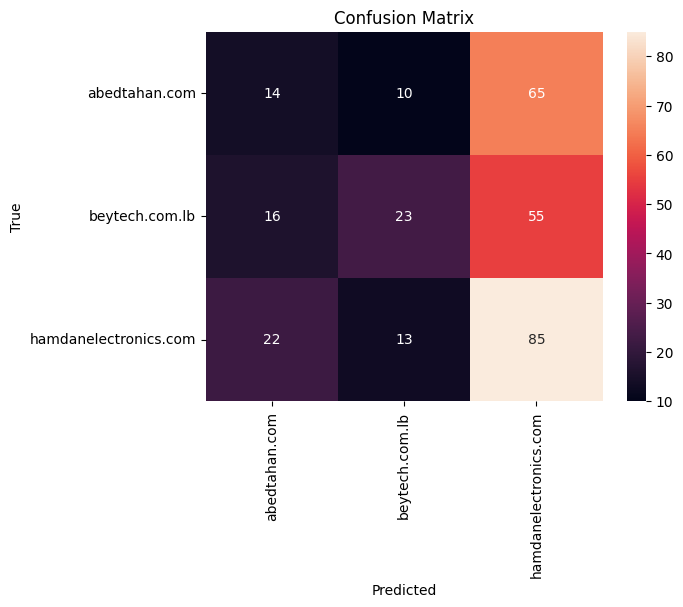

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

abed_keywords = list(abedtahan_aggregated['keywords'].union(abedtahan_aggregated['tfidf'], 
                                                            abedtahan_aggregated['nav_bar'], 
                                                            abedtahan_aggregated['product_names']))
hamdan_keywords = list(hamdan_aggregated['keywords'].union(hamdan_aggregated['tfidf'], 
                                                            hamdan_aggregated['nav_bar'], 
                                                            hamdan_aggregated['product_names']))
beytech_keywords = list(beytech_aggregated['keywords'].union(beytech_aggregated['tfidf'], 
                                                              beytech_aggregated['nav_bar'], 
                                                              beytech_aggregated['product_names']))

print(f"Size of abedtahan.com keywords: {len(abed_keywords)}")
print(f"Size of hamdanelectronics.com keywords: {len(hamdan_keywords)}")
print(f"Size of beytech.com.lb keywords: {len(beytech_keywords)}")

df = pd.DataFrame({
    "keyword": abed_keywords + hamdan_keywords + beytech_keywords,
    "website": ["abedtahan.com"] * len(abed_keywords) + ["hamdanelectronics.com"] * len(hamdan_keywords) + ["beytech.com.lb"] * len(beytech_keywords)
})

print(f"Size of the document (total keywords): {len(df)}")

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['keyword']) 
y = df['website'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

new_keywords = ["smart TV", "gaming laptop", "kitchen blender"]
X_new = vectorizer.transform(new_keywords)
predictions = model.predict(X_new)

for keyword, prediction in zip(new_keywords, predictions):
    print(f"'{keyword}' is most likely from: {prediction}")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
